In [2]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
from pmdarima import arima

In [4]:
#pip install statsmodels --upgrade

In [5]:
df_1 = pd.read_csv('C:/Users/lenovo/Desktop/gani/ResearchProject/KTMK_monthly.csv')
df_1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,Apr-13,353.55,327.5,358.25,307.5,20.64M,8.28%
1,May-13,391.48,352,403.67,350.6,24.53M,10.73%
2,Jun-13,361.1,390.63,392.85,341.5,26.51M,-7.76%
3,Jul-13,326.17,361.5,381.15,311.25,37.96M,-9.67%
4,Aug-13,329.8,327.6,337.5,294,62.41M,1.11%


In [6]:
print(df_1.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')


In [7]:
df_2 = df_1[['Date','Price']]
df_2.head()

,Date,Price
0,Apr-13,353.55
1,May-13,391.48
2,Jun-13,361.1
3,Jul-13,326.17
4,Aug-13,329.8


In [8]:
df_2.dtypes

Date     object
Price    object
dtype: object

In [9]:
from datetime import datetime
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22252\4214241446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')


In [10]:
df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22252\355248658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')


In [11]:
df_2.set_index('Date',inplace=True)

In [12]:
df_2.head()

,Price
Date,
2013-04,353.55
2013-05,391.48
2013-06,361.10
2013-07,326.17
2013-08,329.80


In [13]:
print('shape of data',df_2.shape)

shape of data (120, 1)


<AxesSubplot:xlabel='Date'>

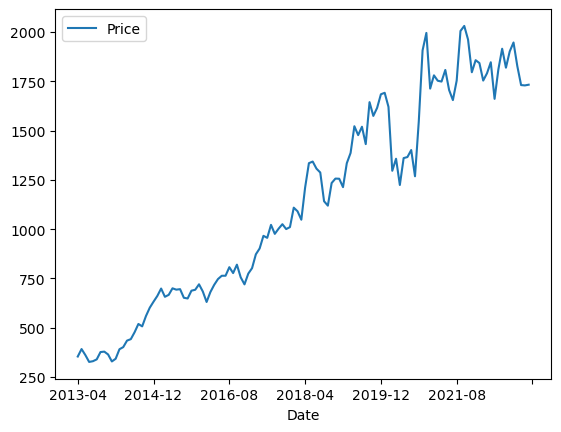

In [14]:
df_2.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df_2['Price'])

In [16]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['Price'])

ADF Test Statistic : -0.9831576208689407
p-value : 0.7593575007443908
#Lags Used : 8
Number of Observations Used : 111
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.Price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.983158
p-value: 0.759358


In [18]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_2.Price,test="adf")

0

In [19]:
df_2['first_diff'] = df_2['Price'].diff().dropna()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23948\1360018562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['first_diff'] = df_2['Price'].diff().dropna()


In [20]:
df_2.head()

,Price,first_diff
Date,,
2013-04,353.55,NaN
2013-05,391.48,37.93
2013-06,361.10,-30.38
2013-07,326.17,-34.93
2013-08,329.80,3.63


In [21]:
df_2.dropna(subset=['first_diff'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23948\2139689955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(subset=['first_diff'], inplace=True)


In [22]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['first_diff'])

ADF Test Statistic : -6.87495839012984
p-value : 1.4826863549446608e-09
#Lags Used : 7
Number of Observations Used : 111
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.first_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.874958
p-value: 0.000000


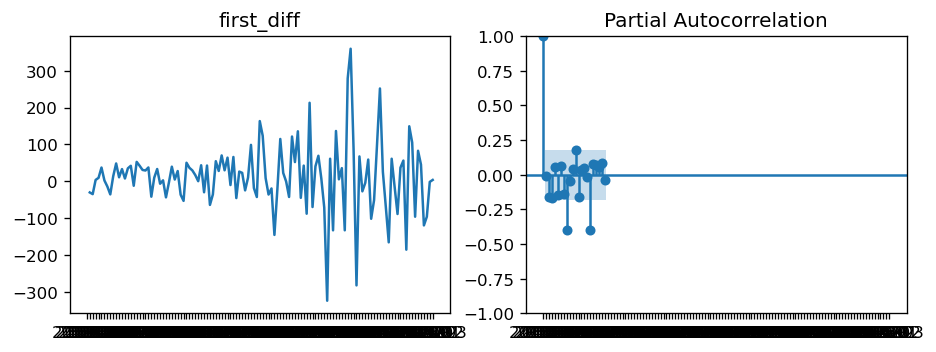

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('first_diff')
axes[1].set(ylim=(0,5))
plot_pacf(df_2.Price.diff().dropna(), ax=axes[1]) #plotiing of 1st diff

plt.show()
#p=0,d=1

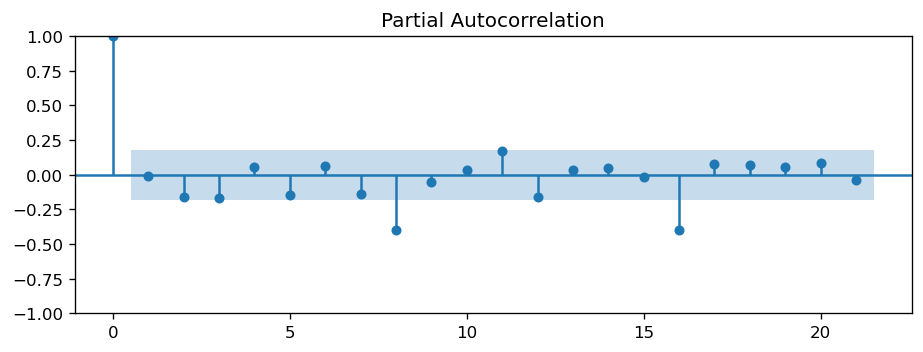

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.first_diff); axes[0].set_title('first_diff')
#axes[1].set(ylim=(0,5))
plot_pacf(df_2.first_diff.dropna())#, ax=axes[1])

plt.show()

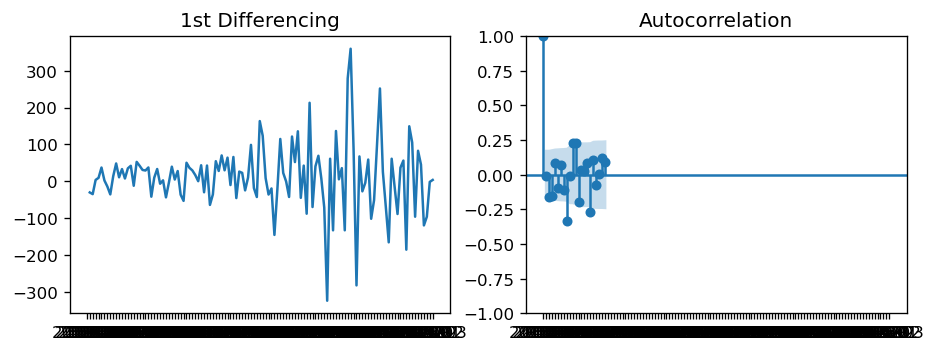

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna(), ax=axes[1])

plt.show()

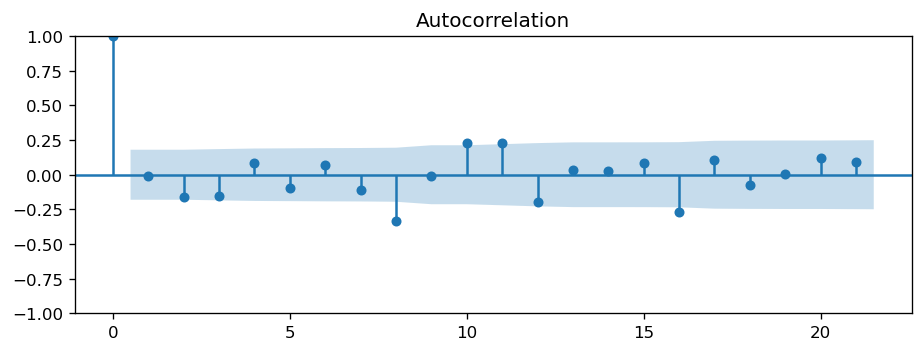

In [27]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna())

plt.show()
#q=0

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(df_2['Price'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -699.137
Date:                Wed, 15 Nov 2023   AIC                           1404.273
Time:                        21:57:24   BIC                           1412.585
Sample:                    05-01-2013   HQIC                          1407.648
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6964      0.280      2.490      0.013       0.148       1.244
ma.L1         -0.7885      0.258     -3.052      0.002      -1.295      -0.282
sigma2      8204.2472    725.021     11.316      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


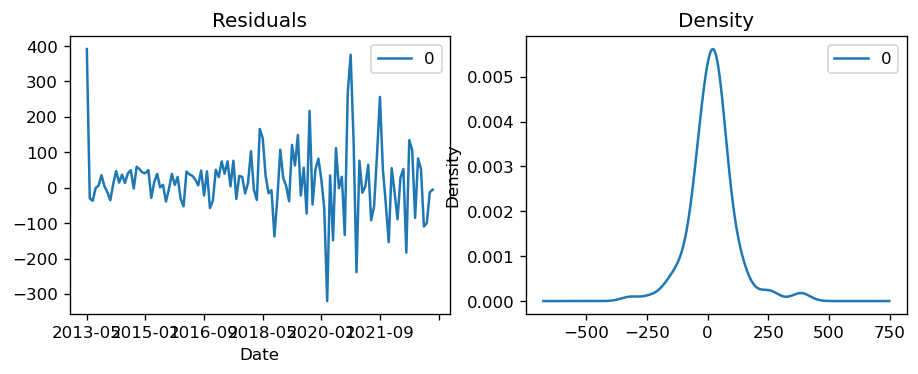

In [29]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [30]:
import matplotlib.pyplot as plt

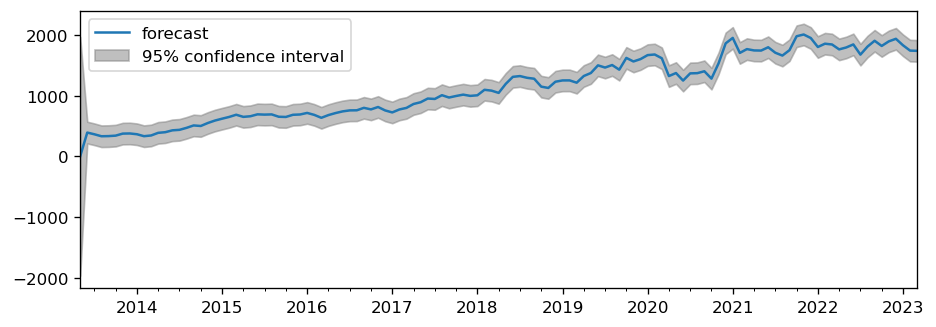

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit,dynamic=False)
plt.show()

In [32]:
from statsmodels.tsa.stattools import acf
# Assuming df is your DataFrame
train = df_2['Price'][:55] # first 55 values 
test = df_2['Price'][55:] # from 56th till last

In [33]:
print('shape of train\n',train.shape)
print('shape of train\n',test.shape)
#55+64 =119 (1 nan value)

shape of train
 (55,)
shape of train
 (64,)


# MODEL BUILD FOR TRAIN AND TEST DATA

In [34]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit() 

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [36]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [37]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


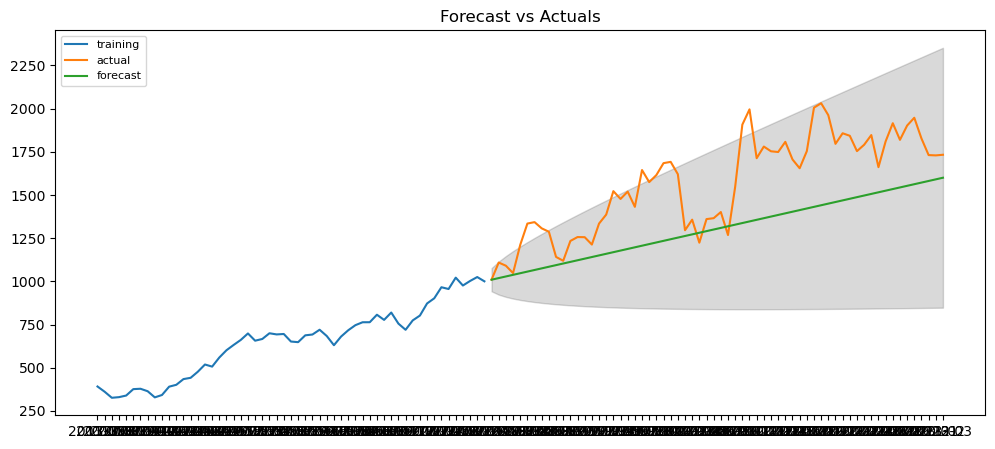

In [38]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
train.head()

Date
2013-05    391.48
2013-06    361.10
2013-07    326.17
2013-08    329.80
2013-09    339.05
Name: Price, dtype: float64

- BEST RESULTS FROM ORDER(1,2,2)

In [40]:
model = ARIMA(train, order=(1,2,2))  
fitted = model.fit() 
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -263.295
Date:                Wed, 15 Nov 2023   AIC                            534.590
Time:                        21:57:41   BIC                            542.471
Sample:                    05-01-2013   HQIC                           537.621
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.151     -5.958      0.000      -1.192      -0.602
ma.L1         -0.0009      4.858     -0.000      1.000      -9.522       9.520
ma.L2         -0.9991      0.256     -3.904      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        fitted = model.fit()
        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {fitted.aic}")
        print(fitted.summary())
    except:
        continue


ARIMA(p=0, d=0, q=0) - AIC: 745.3902021728294
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   55
Model:                          ARIMA   Log Likelihood                -370.695
Date:                Wed, 15 Nov 2023   AIC                            745.390
Time:                        12:47:31   BIC                            749.405
Sample:                    05-01-2013   HQIC                           746.943
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        651.4804     27.591     23.612      0.000     597.403     705.558
sigma2      4.186e+04   1.07e+04      3.894      0.000    2.08e+04    6.29e+04
Ljung-

In [42]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

best_aic = float("inf")
best_order = None

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        fitted = model.fit()
        current_aic = fitted.aic

        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {current_aic}")

        # Check if the current model has a lower AIC than the previous best model
        if current_aic < best_aic:
            best_aic = current_aic
            best_order = (p, d, q)

    except:
        continue

if best_order is not None:
    print("\nBest Model:")
    print(f"ARIMA(p={best_order[0]}, d={best_order[1]}, q={best_order[2]}) - AIC: {best_aic}")
    best_model = ARIMA(train, order=best_order)
    best_fitted = best_model.fit()
    print(best_fitted.summary())
else:
    print("No valid model found.")


ARIMA(p=0, d=0, q=0) - AIC: 745.3902021728294
ARIMA(p=0, d=0, q=1) - AIC: 683.4133629430178
ARIMA(p=0, d=0, q=2) - AIC: 648.859136646179
ARIMA(p=0, d=0, q=3) - AIC: 619.3078515784532
ARIMA(p=0, d=1, q=0) - AIC: 540.8721635134744
ARIMA(p=0, d=1, q=1) - AIC: 542.5348358461384
ARIMA(p=0, d=1, q=2) - AIC: 542.4486748126111
ARIMA(p=0, d=1, q=3) - AIC: 544.3455685662885
ARIMA(p=0, d=2, q=0) - AIC: 562.8840555893978
ARIMA(p=0, d=2, q=1) - AIC: 532.2173467239074
ARIMA(p=0, d=2, q=2) - AIC: 534.2135939724798
ARIMA(p=0, d=2, q=3) - AIC: 535.6112845783149
ARIMA(p=0, d=3, q=0) - AIC: 611.6048482322896
ARIMA(p=0, d=3, q=1) - AIC: 559.2541597296519
ARIMA(p=0, d=3, q=2) - AIC: 534.3722922278514
ARIMA(p=0, d=3, q=3) - AIC: 536.3620437229678
ARIMA(p=1, d=0, q=0) - AIC: 558.8435842776556
ARIMA(p=1, d=0, q=1) - AIC: 560.4429152875766
ARIMA(p=1, d=0, q=2) - AIC: 560.1063801895067
ARIMA(p=1, d=0, q=3) - AIC: 562.0542310071476
ARIMA(p=1, d=1, q=0) - AIC: 542.4202016412764
ARIMA(p=1, d=1, q=1) - AIC: 541.926

# Test and train model using better model (1,2,2)

In [41]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [42]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [43]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


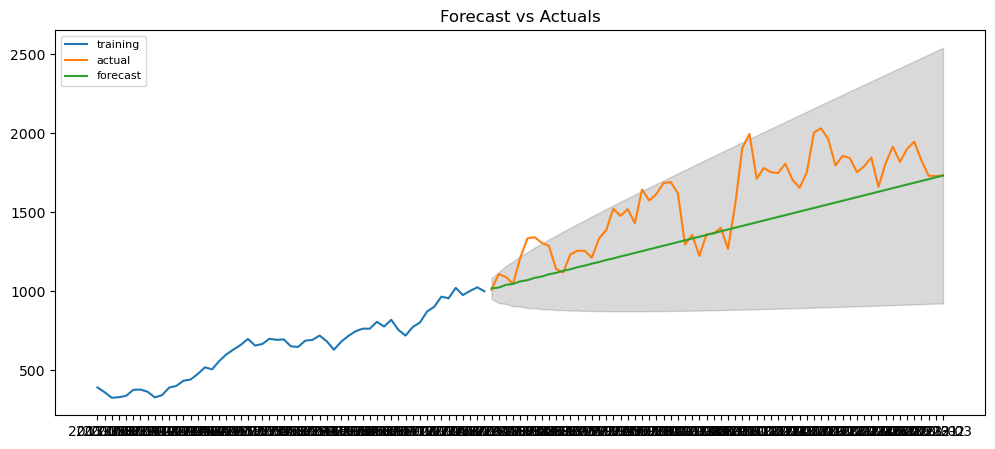

In [44]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show() # 1,2,2

In [45]:
# Assuming forecast_result holds the forecasted values in an array or DataFrame
#forecast_values = forecast_result.values  # Extract forecast values
forecast_values = forecast_result.predicted_mean  # Extract forecast values


In [46]:
test.head()

Date
2017-12    1010.20
2018-01    1108.95
2018-02    1090.55
2018-03    1047.80
2018-04    1211.10
Name: Price, dtype: float64

In [47]:
print("Shape of the DataFrame:", test.shape)

Shape of the DataFrame: (64,)


In [48]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast_values-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast_values, test.values)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23948\2315257816.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23948\2315257816.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.12026086212994987,
 'me': -189.70701443328545,
 'mae': 198.805726941945,
 'mpe': -0.11291026822339388,
 'rmse': 243.7070460876713,
 'acf1': nan,
 'corr': 0.8391418691854523,
 'minmax': 0.11997965791669252}

- MAPE (Mean Absolute Percentage Error)
- ME (Mean Error)
- MAE (Mean Absolute Error)
- MPE (Mean Percentage Error)
- RMSE (Root Mean Squared Error)
- correlation coefficient
- minmax accuracy
- ACF1 (Auto-correlation of errors at lag 1).

--Around 15.73% MAPE implies the model is about 84.27% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.

# WORKING ON ACTUAL DATA

In [68]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

best_aic = float("inf")
best_order = None

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2['Price'], order=(p, d, q))
        fitted = model.fit()
        current_aic = fitted.aic

        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {current_aic}")

        # Check if the current model has a lower AIC than the previous best model
        if current_aic < best_aic:
            best_aic = current_aic
            best_order = (p, d, q)

    except:
        continue

if best_order is not None:
    print("\nBest Model:")
    print(f"ARIMA(p={best_order[0]}, d={best_order[1]}, q={best_order[2]}) - AIC: {best_aic}")
    best_model = ARIMA(df_2['Price'], order=best_order)
    best_fitted = best_model.fit()
    print(best_fitted.summary())
else:
    print("No valid model found.")


ARIMA(p=0, d=0, q=0) - AIC: 1828.917129839064
ARIMA(p=0, d=0, q=1) - AIC: 1692.6419534667812
ARIMA(p=0, d=0, q=2) - AIC: 1597.1121354139423
ARIMA(p=0, d=0, q=3) - AIC: 1591.738182938062
ARIMA(p=0, d=1, q=0) - AIC: 1402.208041219243
ARIMA(p=0, d=1, q=1) - AIC: 1404.2033287320094
ARIMA(p=0, d=1, q=2) - AIC: 1404.164327213071
ARIMA(p=0, d=1, q=3) - AIC: 1402.9264400161373
ARIMA(p=0, d=2, q=0) - AIC: 1471.7349685504355
ARIMA(p=0, d=2, q=1) - AIC: 1396.2391520787348
ARIMA(p=0, d=2, q=2) - AIC: 1398.2309320512222
ARIMA(p=0, d=2, q=3) - AIC: 1397.5297180107266
ARIMA(p=0, d=3, q=0) - AIC: 1581.8297911757777
ARIMA(p=0, d=3, q=1) - AIC: 1466.8538388135805
ARIMA(p=0, d=3, q=2) - AIC: 1397.09578682836
ARIMA(p=0, d=3, q=3) - AIC: 1399.0758453270762
ARIMA(p=1, d=0, q=0) - AIC: 1421.240423054805
ARIMA(p=1, d=0, q=1) - AIC: 1423.2120540750486
ARIMA(p=1, d=0, q=2) - AIC: 1423.4754661916
ARIMA(p=1, d=0, q=3) - AIC: 1422.49102724984
ARIMA(p=1, d=1, q=0) - AIC: 1404.204629928666
ARIMA(p=1, d=1, q=1) - AIC

In [84]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2['Price'], order=(p, d, q))
        fitted = model.fit()
        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {fitted.aic}")
        print(fitted.summary())
    except:
        continue


ARIMA(p=0, d=0, q=0) - AIC: 1828.917129839064
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                          ARIMA   Log Likelihood                -912.459
Date:                Wed, 15 Nov 2023   AIC                           1828.917
Time:                        12:39:31   BIC                           1834.475
Sample:                    05-01-2013   HQIC                          1831.174
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1141.9830     47.723     23.929      0.000    1048.447    1235.519
sigma2      2.688e+05   6.08e+04      4.418      0.000     1.5e+05    3.88e+05
Ljung-

In [49]:
from pmdarima import auto_arima
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_2['Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1401.729, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1402.364, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.351, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1404.345, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1402.208, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1399.646, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1397.356, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1397.266, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1403.110, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1399.209, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1398.997, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1402.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -693.633
Date:                Wed, 15 Nov 2023   AIC                           1397.266
Time:                        21:19:24   BIC                           1411.119
Sample:                    05-01-2013   HQIC                          1402.891
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.1190      2.336      5.616      0.000       8.541      17.697
ma.L1         -0.0575      0.075     -0.761      0.446      -0.205       0.090
ma.L2         -0.3240      0.066     -4.943      0.000      -0.452      -0.196
ma.L3         -0.3301      0.068     -4.887      0.000      -0.462      -0.198
sigma2      7422.8285    748.753      9.914      0.000    5955.299    8890.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.89
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              15.56   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

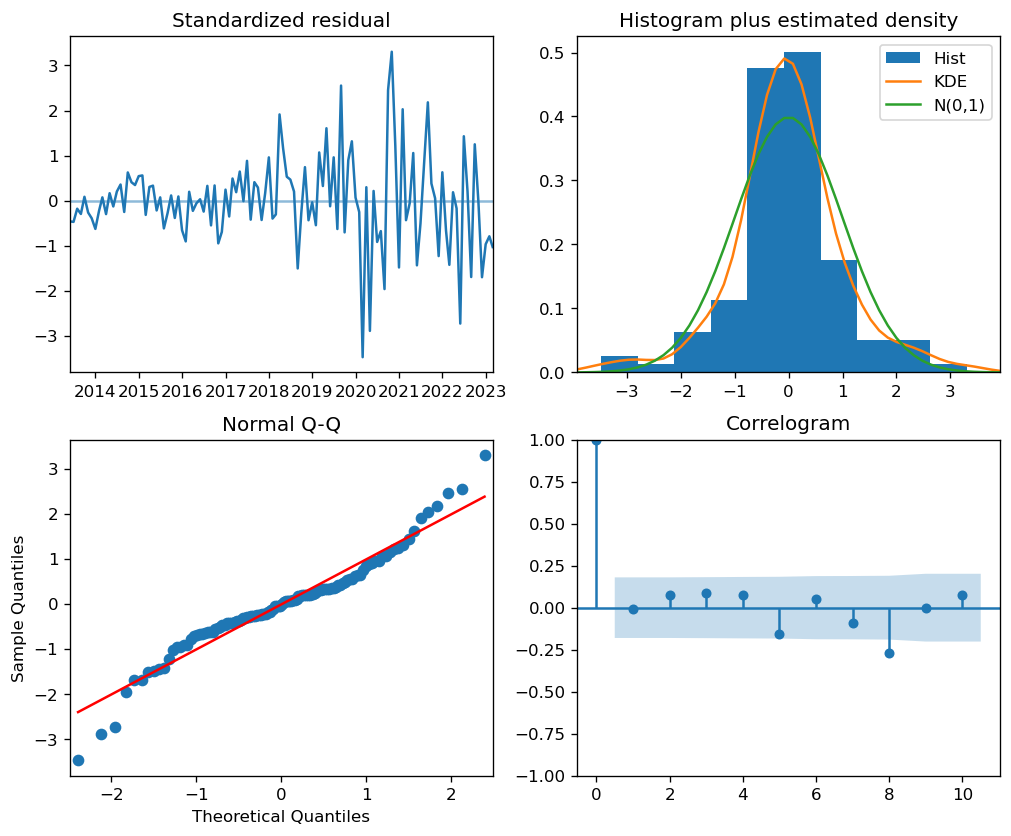

In [50]:
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [49]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_2.Price, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2037.567, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1423.154, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1423.171, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1423.202, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.713 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -708.577
Date:        

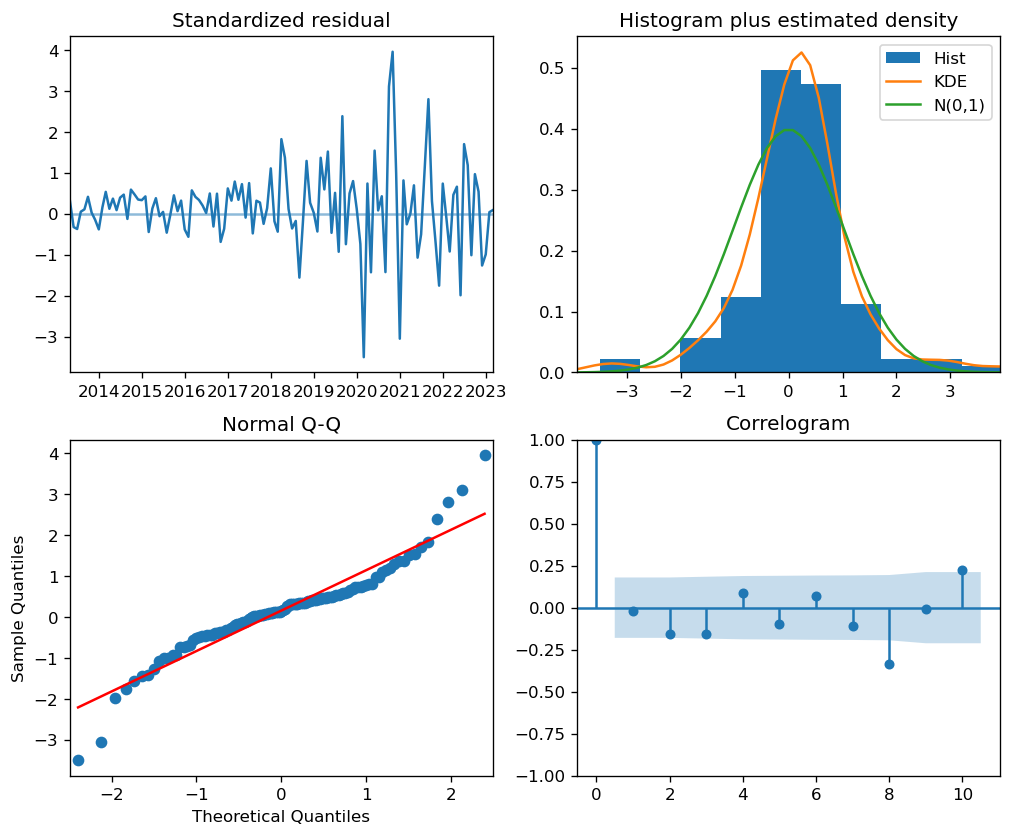

In [50]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [51]:
df_3=df_2.copy()

In [52]:
df_3.tail()

,Price,first_diff
Date,,
2022-11,1947.05,45.10
2022-12,1827.25,-119.80
2023-01,1731.00,-96.25
2023-02,1729.25,-1.75
2023-03,1732.85,3.60


In [53]:
#df_3.reset_index(drop=False, inplace=True)

In [54]:
print(df_3.columns)

Index(['Price', 'first_diff'], dtype='object')


In [55]:
model = ARIMA(df_3['Price'], order=(1,0,1))  
fitted = model.fit() 
print(fitted.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [56]:
# Forecast
n_periods = 24
#fc, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True,alpha=0.25)   #stepwise_fit (0,1,3)
#index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

fc, confint = model.predict(n_periods=n_periods, return_conf_int=True,alpha=0.25)   #(1,0,1)auto arima mode

In [62]:

# Fit the ARIMA model
model = ARIMA(df_3['Price'], order=(3, 2, 3))
fitted = model.fit()

# Forecast
n_periods = 24
confint = fitted.forecast(steps=n_periods)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [57]:
print(confint)

[[1623.30648823 1833.21418389]
 [1574.68914343 1872.5241742 ]
 [1536.54425121 1901.3867738 ]
 [1503.81630962 1924.85741714]
 [1474.55922596 1944.88212963]
 [1447.77697085 1962.45687354]
 [1422.87821916 1978.17290703]
 [1399.47765565 1992.4154786 ]
 [1377.30750738 2005.4522946 ]
 [1356.17266364 2017.47839935]
 [1335.9256941  2028.64115695]
 [1316.45193795 2039.05516217]
 [1297.66010492 2048.81163941]
 [1279.47608467 2057.98463333]
 [1261.83871914 2066.63523647]
 [1244.69682657 2074.81456525]
 [1228.00705182 2082.56590966]
 [1211.73227861 2089.92632099]
 [1195.84043394 2096.92780744]
 [1180.30357223 2103.59824995]
 [1165.09716317 2109.96211436]
 [1150.19953048 2116.04101268]
 [1135.59140407 2121.85415087]
 [1121.25555895 2127.41868999]]


In [ ]:

# Plotting the actual data
plt.figure(figsize=(10, 6))
plt.plot(df_3.index, df_3['Price'], label='Actual')


# Plotting confidence intervals
plt.fill_between(index_of_fc, confint[:, 0], confint[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
print(fc)

2023-04-01    1800.622145
2023-05-01    1864.979117
2023-06-01    1907.390145
2023-07-01    1920.509194
2023-08-01    1933.628244
2023-09-01    1946.747293
2023-10-01    1959.866342
2023-11-01    1972.985392
2023-12-01    1986.104441
2024-01-01    1999.223490
2024-02-01    2012.342540
2024-03-01    2025.461589
2024-04-01    2038.580638
2024-05-01    2051.699688
2024-06-01    2064.818737
2024-07-01    2077.937786
2024-08-01    2091.056836
2024-09-01    2104.175885
2024-10-01    2117.294934
2024-11-01    2130.413984
2024-12-01    2143.533033
2025-01-01    2156.652082
2025-02-01    2169.771132
2025-03-01    2182.890181
Freq: MS, dtype: float64


In [58]:
test.head()

Date
2017-12    1010.20
2018-01    1108.95
2018-02    1090.55
2018-03    1047.80
2018-04    1211.10
Name: Price, dtype: float64

In [59]:
index_future_dates = pd.date_range(start='2023-04', end='2025-03', freq='MS')
print(index_future_dates)
print(len(index_future_dates))

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', freq='MS')
24


In [60]:
# make series for plotting purpose
#fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_future_dates)
upper_series = pd.Series(confint[:, 1], index=index_future_dates)

In [61]:
print(confint)

[[1623.30648823 1833.21418389]
 [1574.68914343 1872.5241742 ]
 [1536.54425121 1901.3867738 ]
 [1503.81630962 1924.85741714]
 [1474.55922596 1944.88212963]
 [1447.77697085 1962.45687354]
 [1422.87821916 1978.17290703]
 [1399.47765565 1992.4154786 ]
 [1377.30750738 2005.4522946 ]
 [1356.17266364 2017.47839935]
 [1335.9256941  2028.64115695]
 [1316.45193795 2039.05516217]
 [1297.66010492 2048.81163941]
 [1279.47608467 2057.98463333]
 [1261.83871914 2066.63523647]
 [1244.69682657 2074.81456525]
 [1228.00705182 2082.56590966]
 [1211.73227861 2089.92632099]
 [1195.84043394 2096.92780744]
 [1180.30357223 2103.59824995]
 [1165.09716317 2109.96211436]
 [1150.19953048 2116.04101268]
 [1135.59140407 2121.85415087]
 [1121.25555895 2127.41868999]]


# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])

model = ARIMA(df_2['Price'], order=(0, 1, 3))
fitted_model = model.fit()
# Forecast
forecast_steps = 24
forecast_result = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
index_of_fc = test.index[:forecast_steps]
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)



In [82]:
df_3=df_2.copy()

In [67]:
import statsmodels.api as sm

# MORE PREDICTIONS

In [62]:
# Forecast
n_periods = 26


In [63]:
# Assuming df_3 is your DataFrame with a DatetimeIndex
# Convert the index of df_3 to datetime if it's not already in datetime format
df_3.index = pd.to_datetime(df_3.index)

# Generate future dates using DateOffset
from pandas.tseries.offsets import DateOffset
future_dates = [df_3.index[-1] + DateOffset(months=x) for x in range(1, 25)]

# This will create future_dates starting from the next month after the last date in df_3


In [66]:
print(future_dates)

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', freq='MS')


In [65]:
import pandas as pd

# Assuming df_3 is your DataFrame with a DatetimeIndex
# Convert the index of df_3 to datetime if it's not already in datetime format
df_3.index = pd.to_datetime(df_3.index)

# Generate future dates incrementing by one month
future_dates = pd.date_range(start=df_3.index[-1], periods=25, freq='MS')[1:]

# This will create future_dates starting from the next month after the last date in df_3


In [67]:
future_datest=pd.DataFrame(index=future_dates[1:],columns=df_3.columns)

In [68]:
future_datest.tail()

,Price,first_diff
2024-11-01,NaN,NaN
2024-12-01,NaN,NaN
2025-01-01,NaN,NaN
2025-02-01,NaN,NaN
2025-03-01,NaN,NaN


In [69]:
future_df=pd.concat([df_3,future_datest])

In [70]:
print(future_df.shape) #119+22

(142, 2)


In [71]:
future_df.tail()

,Price,first_diff
2024-11-01,NaN,NaN
2024-12-01,NaN,NaN
2025-01-01,NaN,NaN
2025-02-01,NaN,NaN
2025-03-01,NaN,NaN


In [72]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Train ARIMA model
order = (3,2,3)  # Example order for ARIMA model (p, d, q)
arima_model = ARIMA(df_2['Price'], order=order)
fitted_model = arima_model.fit()

# Define the number of future time steps you want to predict
num_steps = 24  # Change this value according to your requirement

# Make future predictions using the fitted ARIMA model
future_forecast = fitted_model.forecast(steps=num_steps)

# Print or use future_forecast as needed
print(future_forecast)



C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-04-01    1763.117737
2023-05-01    1800.038079
2023-06-01    1763.309430
2023-07-01    1809.588535
2023-08-01    1818.147162
2023-09-01    1808.973101
2023-10-01    1844.162651
2023-11-01    1845.646742
2023-12-01    1851.371375
2024-01-01    1876.032366
2024-02-01    1878.116656
2024-03-01    1890.508696
2024-04-01    1907.838439
2024-05-01    1912.911194
2024-06-01    1927.278701
2024-07-01    1940.490711
2024-08-01    1948.466835
2024-09-01    1962.673508
2024-10-01    1974.042455
2024-11-01    1984.041538
2024-12-01    1997.425878
2025-01-01    2008.247337
2025-02-01    2019.383539
2025-03-01    2031.967465
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
future_df['forecast']=future_forecast

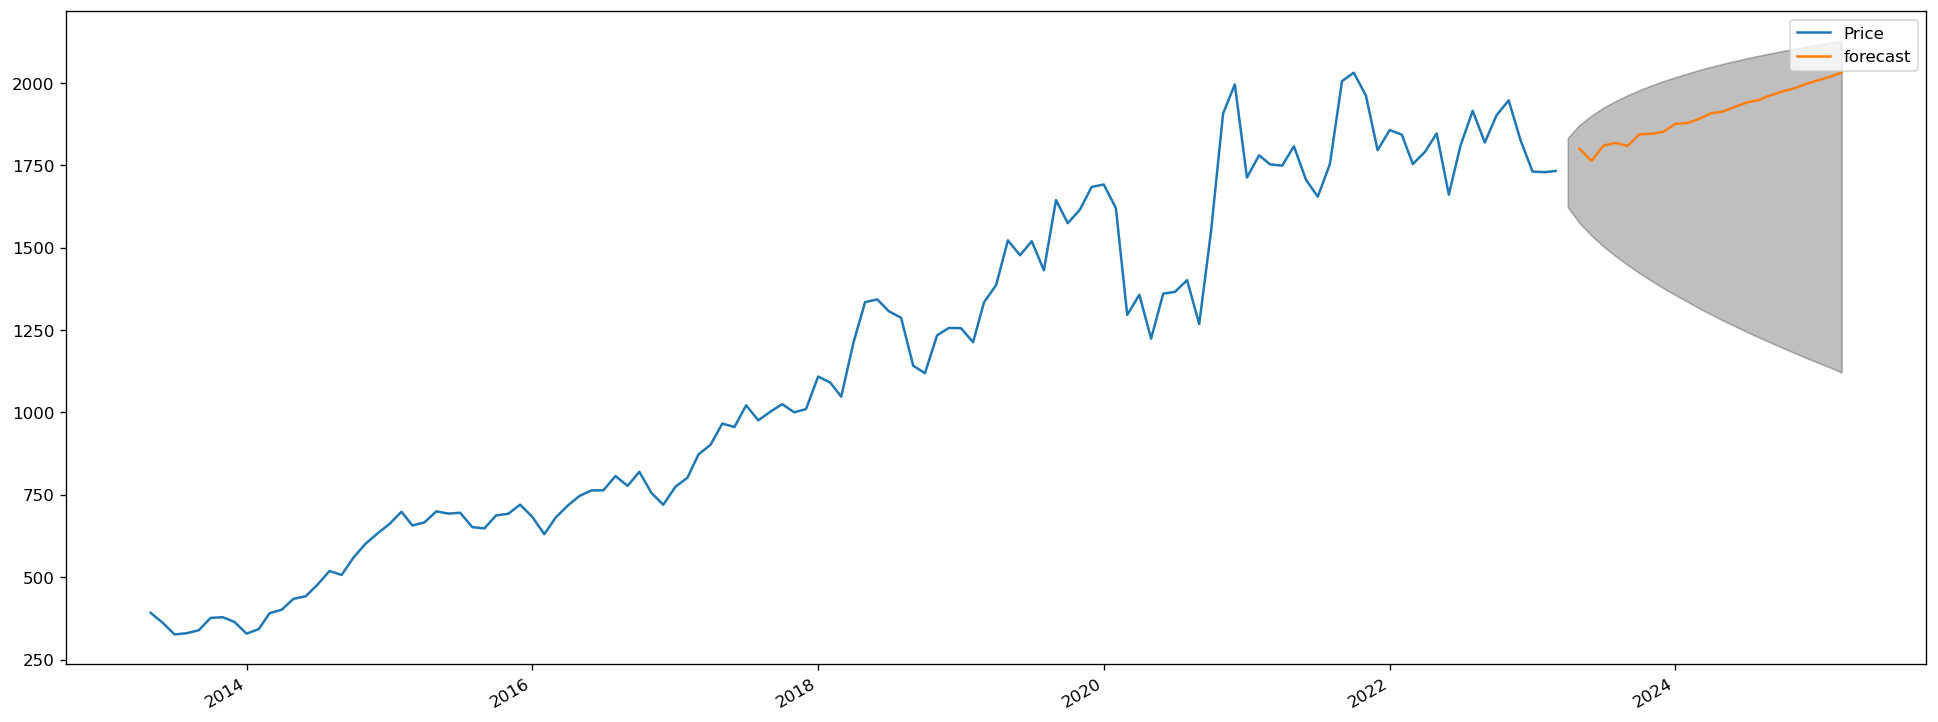

In [74]:
future_df[['Price','forecast']].plot(figsize=(20,8))
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=0.25)

In [84]:
print(lower_series.index)

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', freq='MS')


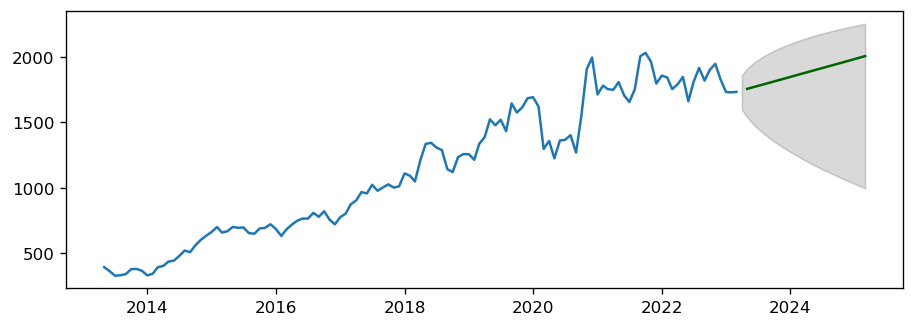

In [142]:
# Plot
plt.plot(future_df.Price)
plt.plot(future_df.forecast, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

In [17]:
df_s=df_2.copy()

In [18]:
df_s.head()

,Price
Date,
2013-04,353.55
2013-05,391.48
2013-06,361.10
2013-07,326.17
2013-08,329.80


# SARIMA

In [75]:
# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [76]:
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

In [77]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

#split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [78]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

In [79]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

In [80]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

In [81]:
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
if __name__ == '__main__':
	# define dataset
	data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
	print(data)
	# data split
	n_test = 4
	# model configs
	cfg_list = sarima_configs()
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	

In [96]:
# list top 3 configs
for cfg, error in scores[:3]:
	print(cfg, error)

NameError: name 'scores' is not defined

In [ ]:
if __name__ == '__main__':
 # load dataset
    series = df_s['Price']
    data = series.values
 #print(data.shape)
 # data split
n_test = 64
 # model configs
cfg_list = sarima_configs()
 # grid search
scores = grid_search(data, cfg_list, n_test)

In [ ]:
print('done')
 # list top 3 configs
for cfg, error in scores[:3]:
print(cfg, error)

In [21]:
df_s.head()

,Price
Date,
2013-04,353.55
2013-05,391.48
2013-06,361.10
2013-07,326.17
2013-08,329.80


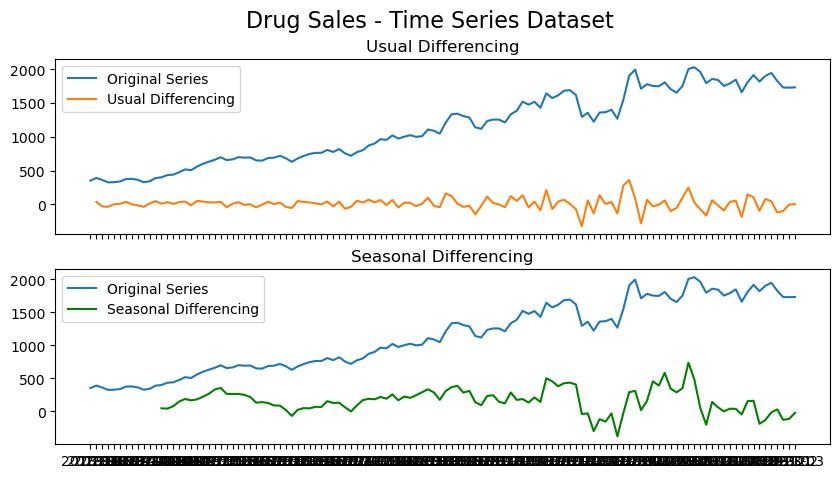

In [36]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_s[:], label='Original Series')
axes[0].plot(df_s[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df_s[:], label='Original Series')
axes[1].plot(df_s[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [37]:
import pmdarima as pm

In [38]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_s, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1432.557, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1312.657, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1494.110, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1366.456, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1311.458, Time=0.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1301.264, Time=0.29 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=1299.815, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -643.907
Date:                              Wed, 15 Nov 2023   AIC                           1299.815
Time:                                      22:10:27   BIC                           1315.908
Sample:                                  04-01-2013   HQIC                          1306.340
                                       - 03-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     60.0249     12.880      4.660      0.000      34.781      85.269
ar.L1          0.9166      0.088     10.373      0.000       0.743       1.090
ar.L2         -0.1880      0.086     -2.198      0.028      -0.356      -0.020
ar.S.L12      -0.2664      0.110     -2.432      0.015      -0.481      -0.052
ma.S.L12      -0.8642      0.266     -3.244      0.001      -1.386      -0.342
sigma2      7200.3002   1376.022      5.233      0.000    4503.347    9897.253
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.63
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              11.44   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast
n_periods = 24

In [45]:
from pandas.tseries.offsets import DateOffset


In [48]:
df_s.tail()

,Price
Date,
2022-11,1947.05
2022-12,1827.25
2023-01,1731.00
2023-02,1729.25
2023-03,1732.85


In [43]:
future_dates = pd.date_range(start=df_s.index[-1], periods=25, freq='MS')[1:]

In [44]:
print(future_dates)

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', freq='MS')


In [49]:
future_datest_seas=pd.DataFrame(index=future_dates[1:],columns=df_s.columns)
future_df_seas=pd.concat([df_s,future_datest_seas])

In [64]:
future_forecast = smodel.predict(steps=64)
print(future_forecast)

2023-04-01    1852.315315
2023-05-01    1950.515394
2023-06-01    2009.205738
2023-07-01    2021.297336
2023-08-01    2033.920176
2023-09-01    2089.251713
2023-10-01    2141.851968
2023-11-01    2200.851150
2023-12-01    2216.268568
2024-01-01    2210.350488
Freq: MS, dtype: float64


In [65]:
from datetime import datetime


# Parse the string into a datetime object
original_date = datetime.strptime(future_dates, '%Y-%m-%d %H:%M:%S')

# Format the datetime object as 'YYYY-MM-DD'
formatted_date = original_date.strftime('%Y-%m-%d')

print(formatted_date)


TypeError: strptime() argument 1 must be str, not DatetimeIndex

In [60]:
future_df_seas.tail()

,Price,forecast
2024-11-01 00:00:00,NaN,NaN
2024-12-01 00:00:00,NaN,NaN
2025-01-01 00:00:00,NaN,NaN
2025-02-01 00:00:00,NaN,NaN
2025-03-01 00:00:00,NaN,NaN


<AxesSubplot:>

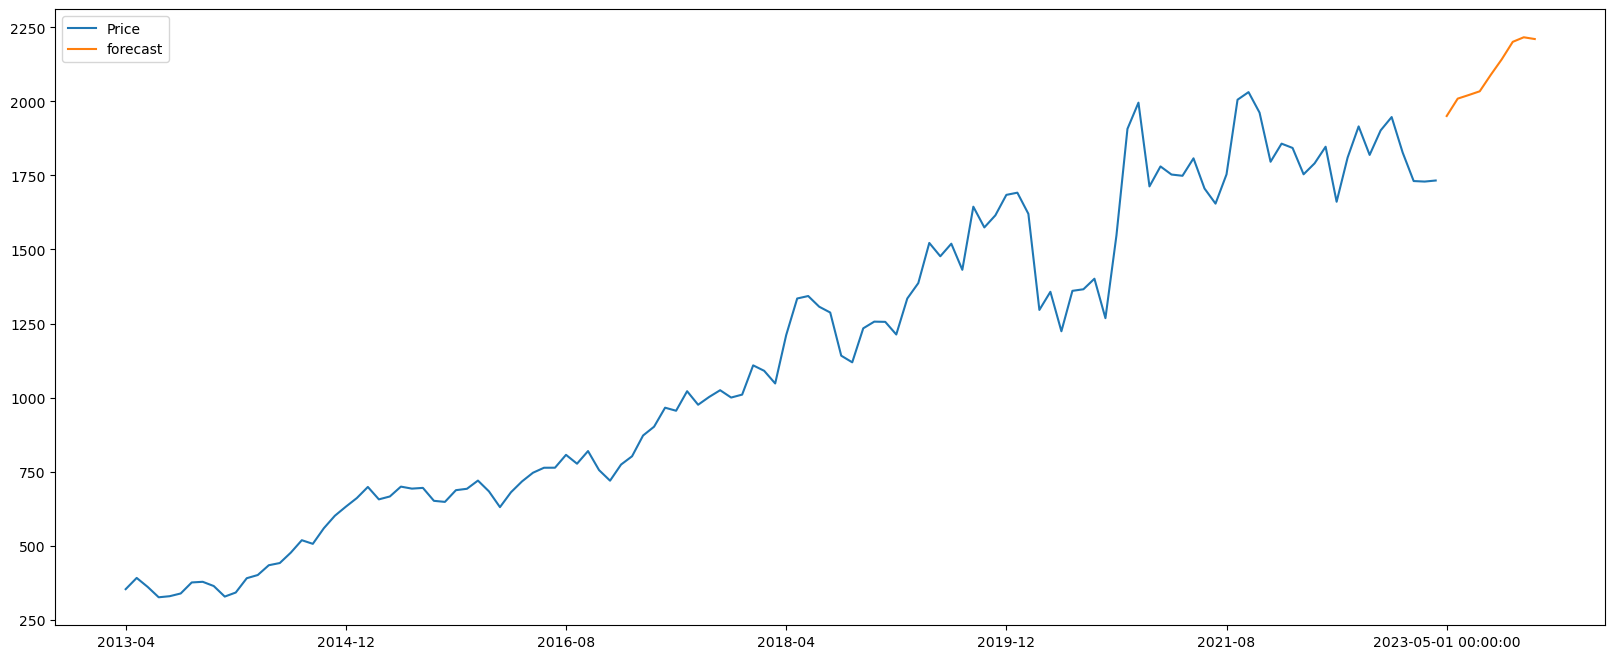

In [55]:
future_df_seas['forecast']=future_forecast

future_df_seas[['Price','forecast']].plot(figsize=(20,8))

In [ ]:
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

In [167]:
model=sm.tsa.statespace.SARIMAX(df_2['Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

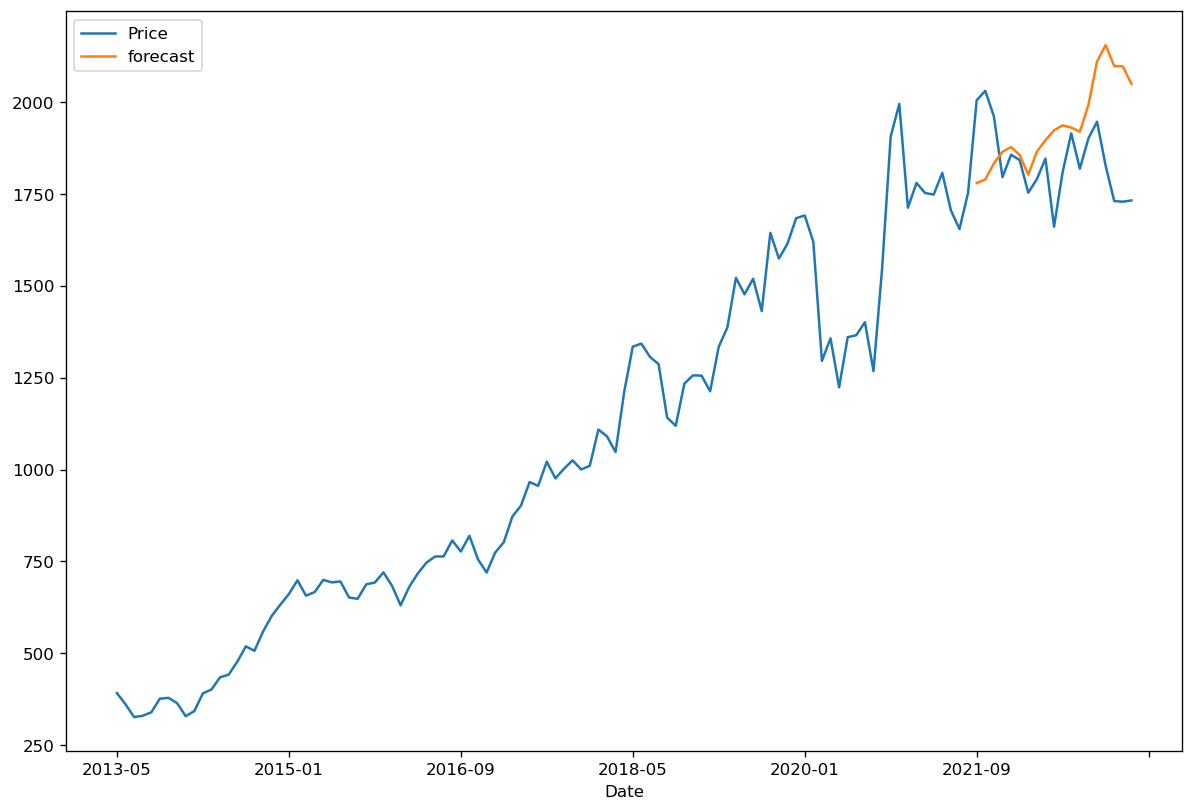

In [168]:
df_3['forecast']=results.predict(start=100,end=120,dynamic=True)
df_3[['Price','forecast']].plot(figsize=(12,8))

In [169]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_3.index[-1]+ DateOffset(months=x)for x in range(0,24)]

TypeError: can only concatenate str (not "DateOffset") to str

In [170]:
future_datest_df_3=pd.DataFrame(index=future_dates[1:],columns=df_3.columns)

In [171]:
future_datest_df_3.tail()

,Price,first_diff,forecast
2024-10-01,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN


In [172]:
future_df_3=pd.concat([df_3,future_datest_df_3])

2021-12-01    1974.438980
2022-01-01    1971.246525
2022-02-01    1935.727293
2022-03-01    1870.555215
2022-04-01    1923.930506
2022-05-01    1946.851704
2022-06-01    1966.974618
2022-07-01    1974.995900
2022-08-01    1964.645999
2022-09-01    1957.763006
2022-10-01    2028.823326
2022-11-01    2141.029311
2022-12-01    2183.782178
2023-01-01    2125.326314
2023-02-01    2123.448415
2023-03-01    2075.372617
2023-04-01    2122.119920
2023-05-01    2159.600486
2023-06-01    2156.089698
2023-07-01    2154.621561
2023-08-01    2173.889587
2023-09-01    2231.324914
2023-10-01    2294.377455
2023-11-01    2365.949289
2023-12-01    2403.478601
2024-01-01    2359.772310
2024-02-01    2351.293128
2024-03-01    2300.347155
2024-04-01    2349.522468
2024-05-01    2384.269295
2024-06-01    2386.861694
2024-07-01    2388.030080
2024-08-01    2400.549610
2024-09-01    2442.887469
2024-10-01    2507.877890
2024-11-01    2588.981390
2024-12-01    2627.657846
2025-01-01    2580.426384
Freq: MS, Na

<AxesSubplot:>

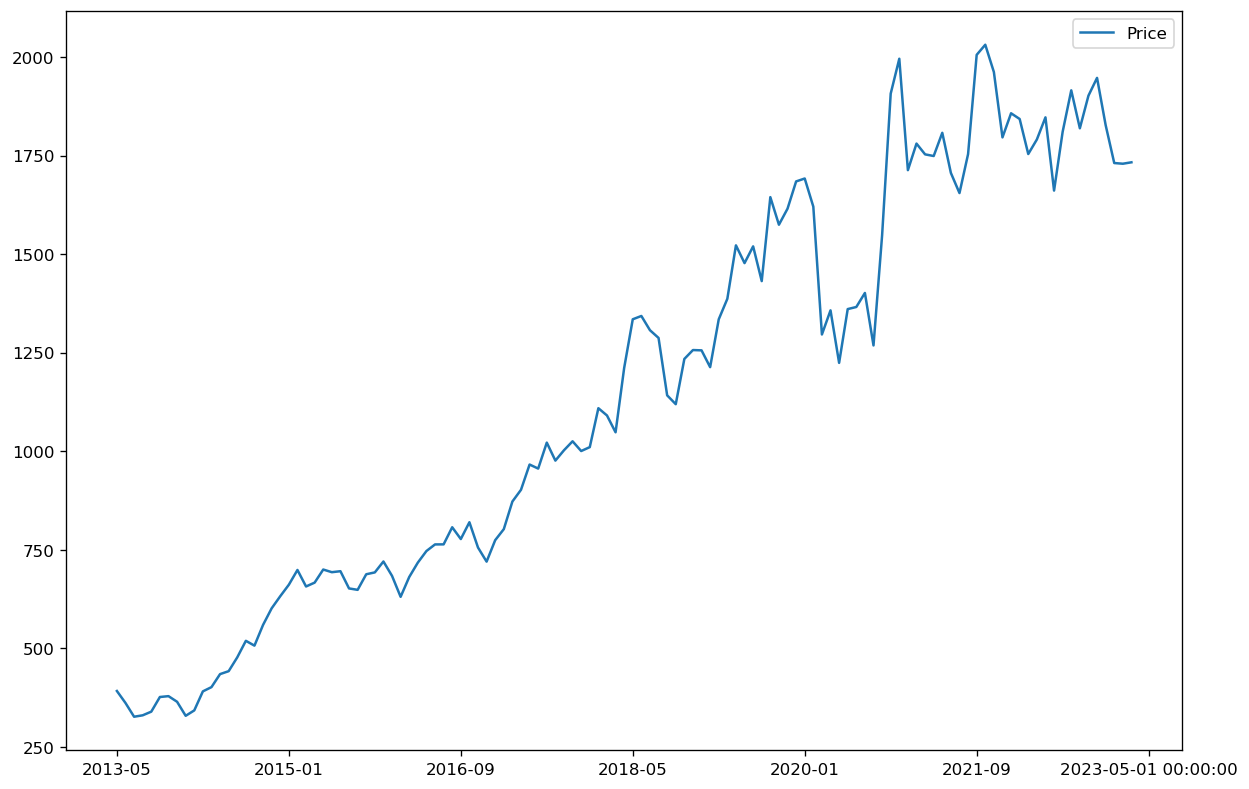

In [182]:
future_df_3['forecast'] = print(results.predict(start = 103, end = 140, dynamic= True) )
future_df_3[['Price', 'forecast']].plot(figsize=(12, 8)) 

In [180]:
print(results.predict(start = 120, end = 142, dynamic= True) )

2023-05-01    1904.494732
2023-06-01    1927.275830
2023-07-01    1957.997610
2023-08-01    2003.719515
2023-09-01    2076.579331
2023-10-01    2154.736846
2023-11-01    2235.628027
2023-12-01    2229.978380
2024-01-01    2208.289772
2024-02-01    2209.752082
2024-03-01    2157.046358
2024-04-01    2204.726472
2024-05-01    2249.527971
2024-06-01    2198.295126
2024-07-01    2235.304943
2024-08-01    2276.056356
2024-09-01    2292.377322
2024-10-01    2357.171597
2024-11-01    2417.010492
2024-12-01    2373.562716
2025-01-01    2324.880098
2025-02-01    2317.432958
2025-03-01    2271.069302
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


HERE

In [61]:
# Forecast
n_periods = 24
#fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)


In [ ]:
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [62]:
# Assuming df_3 is your DataFrame with a DatetimeIndex
# Convert the index of df_3 to datetime if it's not already in datetime format
df_3.index = pd.to_datetime(df_3.index)

# Generate future dates using DateOffset
from pandas.tseries.offsets import DateOffset
future_dates = [df_3.index[-1] + DateOffset(months=x) for x in range(1, 25)]

# This will create future_dates starting from the next month after the last date in df_3


In [66]:
print(future_dates)

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', freq='MS')


In [64]:
import pandas as pd

# Assuming df_3 is your DataFrame with a DatetimeIndex
# Convert the index of df_3 to datetime if it's not already in datetime format
df_3.index = pd.to_datetime(df_3.index)

# Generate future dates incrementing by one month
future_dates = pd.date_range(start=df_3.index[-1], periods=25, freq='MS')[1:]

# This will create future_dates starting from the next month after the last date in df_3


In [65]:
future_datest=pd.DataFrame(index=future_dates[1:],columns=df_3.columns)

In [79]:
future_datest.tail()

,Price,first_diff
2024-11-01,NaN,NaN
2024-12-01,NaN,NaN
2025-01-01,NaN,NaN
2025-02-01,NaN,NaN
2025-03-01,NaN,NaN


In [68]:
future_df=pd.concat([df_3,future_datest])

In [78]:
print(future_df.shape) #119+22

(142, 2)


In [225]:
# Forecast
n_periods = 26
#fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

#fc=model.predict(start = 113, end = 140, dynamic= True)  

TypeError: predict() missing 1 required positional argument: 'params'

In [156]:
print(fc)

2023-04-01    1728.260336
2023-05-01    1723.606659
2023-06-01    1718.965513
2023-07-01    1714.336863
2023-08-01    1709.720678
2023-09-01    1705.116922
2023-10-01    1700.525563
2023-11-01    1695.946567
2023-12-01    1691.379901
2024-01-01    1686.825531
Freq: MS, dtype: float64


In [80]:
future_df['forecast']=future_forecast

In [81]:
future_df.head()

,Price,first_diff,forecast
2013-05-01,391.48,37.93,NaN
2013-06-01,361.10,-30.38,NaN
2013-07-01,326.17,-34.93,NaN
2013-08-01,329.80,3.63,NaN
2013-09-01,339.05,9.25,NaN


In [73]:
import statsmodels.tsa.arima_model.ARIMA

ModuleNotFoundError: No module named 'statsmodels.tsa.arima_model.ARIMA'; 'statsmodels.tsa.arima_model' is not a package

In [82]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Train ARIMA model
order = (1, 2, 1)  # Example order for ARIMA model (p, d, q)
arima_model = ARIMA(df_2['Price'], order=order)
fitted_model = arima_model.fit()

# Define the number of future time steps you want to predict
num_steps = 24  # Change this value according to your requirement

# Make future predictions using the fitted ARIMA model
future_forecast = fitted_model.forecast(steps=num_steps)

# Print or use future_forecast as needed
print(future_forecast)


2023-04-01    1744.261480
2023-05-01    1755.654737
2023-06-01    1767.048036
2023-07-01    1778.441336
2023-08-01    1789.834635
2023-09-01    1801.227934
2023-10-01    1812.621234
2023-11-01    1824.014533
2023-12-01    1835.407832
2024-01-01    1846.801132
2024-02-01    1858.194431
2024-03-01    1869.587730
2024-04-01    1880.981030
2024-05-01    1892.374329
2024-06-01    1903.767628
2024-07-01    1915.160928
2024-08-01    1926.554227
2024-09-01    1937.947526
2024-10-01    1949.340826
2024-11-01    1960.734125
2024-12-01    1972.127424
2025-01-01    1983.520724
2025-02-01    1994.914023
2025-03-01    2006.307322
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:>

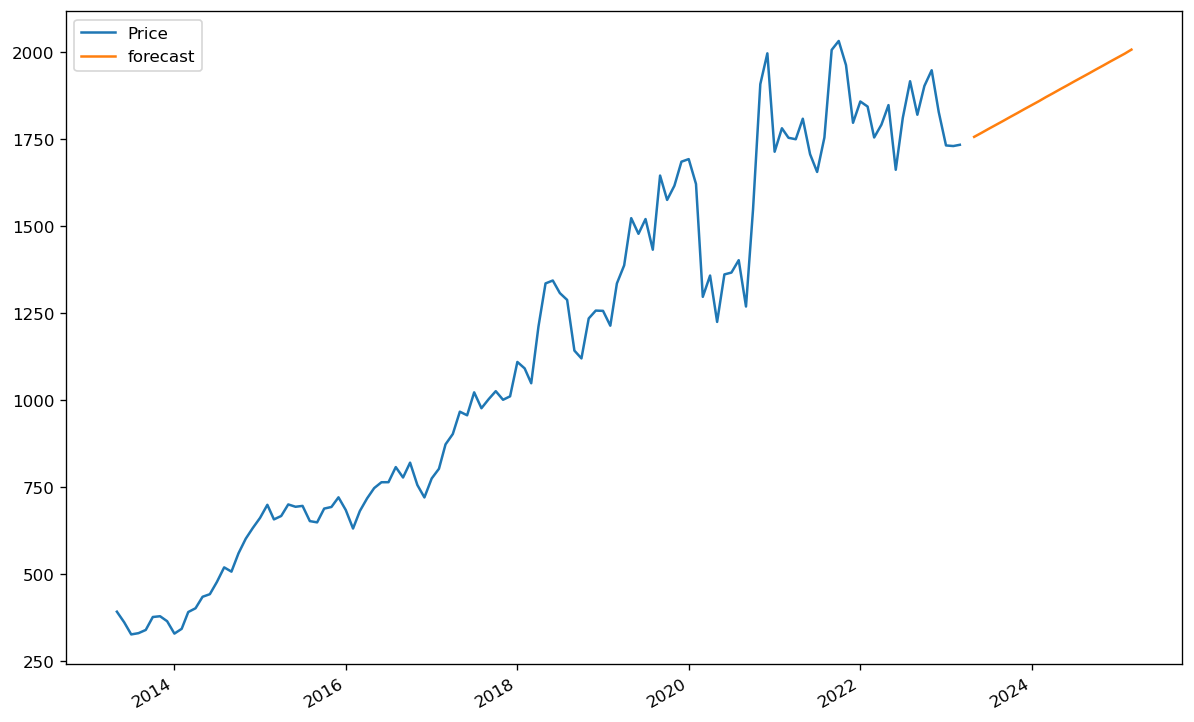

In [83]:
future_df[['Price','forecast']].plot(figsize=(12,8))

In [199]:
print(len(future_forecast))

24


In [1]:
# Forecast 'n_periods' steps ahead
n_periods = 24
forecast, stderr, conf_int = model.predict(steps=n_periods)

# Generate future dates or indices for the forecasted values
# Adjust as per your date range

# Create Series for lower and upper confidence intervals
lower_series = pd.Series(conf_int[:, 0], index=future_dates)
upper_series = pd.Series(conf_int[:, 1], index=future_dates)


NameError: name 'model' is not defined

In [234]:
# Fit your ARIMA model before using get_forecast
# Assuming 'model' is your ARIMA model that has already been fitted using data

# Define the number of periods for forecasting
n_periods = 24

# Use get_forecast to make predictions and obtain confidence intervals
forecast = model.predict(steps=n_periods)

# Extract forecasted 

# Extract confidence intervals
conf_int = forecast.conf_int()

# Generate future dates or indices for the forecasted values
#future_dates = pd.date_range(start='2023-04-01', periods=n_periods, freq='MS')  # Adjust as per your date range

# Create Series for lower and upper confidence intervals
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=future_dates)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=future_dates)


TypeError: predict() missing 1 required positional argument: 'params'

In [184]:
from statsmodels.tsa.arima.model import ARIMA

In [206]:
import numpy as np

# Assuming 'residuals' is a list or array containing historical residuals of your model
# 'forecast_values' contains your forecasted values

# Calculate the standard deviation of the residuals
residual_std = np.std(residuals)

# Define a confidence level (e.g., 95% confidence)
confidence_level = 0.95

# Calculate the number of forecast steps
n_forecast_steps = 24

# Calculate the margin of error for the confidence interval (assuming normal distribution)
margin_of_error = 1.96 * residual_std  # 1.96 corresponds to a 95% confidence level for a normal distribution

# Calculate lower and upper confidence intervals for each forecasted value
lower_confidence_interval = forecast_values - margin_of_error
upper_confidence_interval = forecast_values + margin_of_error


In [215]:
import pandas as pd
import numpy as np

# Assuming 'forecast_values' and 'residuals' are Series or arrays
# Convert 'forecast_values' to a DataFrame to align indices
forecast_df = pd.DataFrame(future_forecast, columns=['Forecast'])

# Calculate the standard deviation of the residuals
residual_std = np.std(residuals)

# Calculate the margin of error for the confidence interval
confidence_level = 0.95
margin_of_error = 1.96 * residual_std  # For a 95% confidence level (assuming a normal distribution)

# Calculate lower and upper confidence intervals for each forecasted value
forecast_df['Lower_CI'] = forecast_df['Forecast'] - margin_of_error
forecast_df['Upper_CI'] = forecast_df['Forecast'] + margin_of_error

# Now, 'forecast_df' contains aligned indices for forecast values and confidence intervals
print(forecast_df)


  Forecast Lower_CI Upper_CI
0      NaN      NaN      NaN


In [216]:
forecast_df

,Forecast,Lower_CI,Upper_CI
0,NaN,NaN,NaN


2017-12-01    1018.214448
2018-01-01    1023.745371
2018-02-01    1040.380342
2018-03-01    1047.058545
2018-04-01    1062.664774
                 ...     
2022-11-01    1686.860887
2022-12-01    1698.255677
2023-01-01    1709.632641
2023-02-01    1721.025589
2023-03-01    1732.404204
Freq: MS, Name: predicted_mean, Length: 64, dtype: float64


ValueError: operands could not be broadcast together with shapes (64,) (65,) 

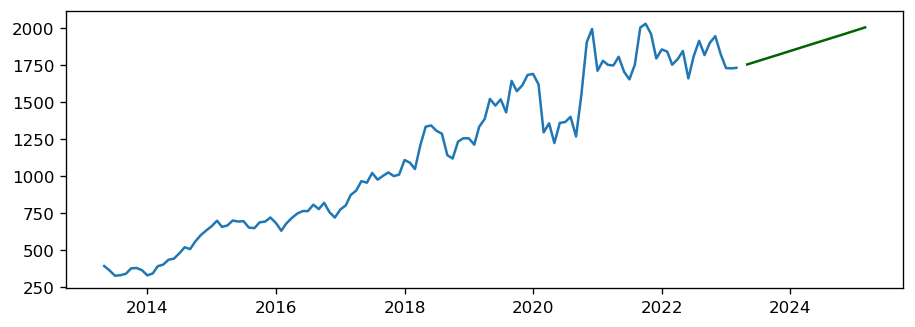

In [201]:
import matplotlib.pyplot as plt

# Assuming 'actual_values' contains the actual price data
# 'forecast_values' contains your forecasted values
# 'lower_confidence_interval' and 'upper_confidence_interval' contain the calculated intervals

# Plot actual 'Price' data
plt.plot(future_df['Price'], label='Actual Price')

# Plot forecasted values
plt.plot(future_df['forecast'], color='darkgreen', label='Forecast')

# Plot confidence intervals using fill_between
plt.fill_between(range(len(forecast_values)), lower_confidence_interval, upper_confidence_interval, color='orange', alpha=.3, label='Confidence Interval')

# Customize plot
plt.title("Actual Price vs Forecast with Confidence Interval")
plt.xlabel("Time")  # You can adjust the x-axis label as needed
plt.ylabel("Price")  # You can adjust the y-axis label as needed
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (142,) (65,) 

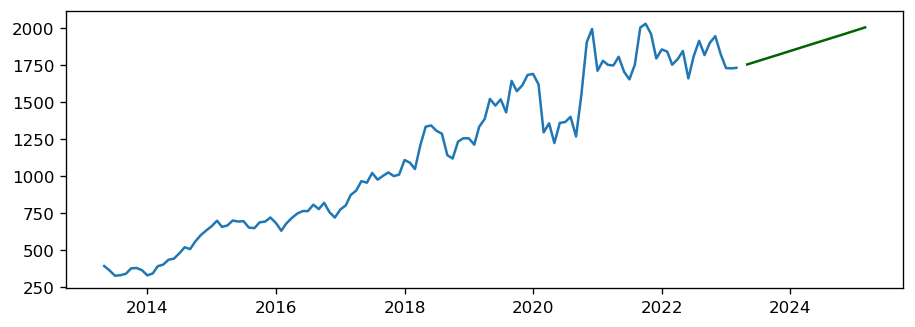

In [204]:
import matplotlib.pyplot as plt

# Assuming 'future_df' contains columns 'Price' for actual prices and 'forecast' for forecasted values
# 'lower_confidence_interval' and 'upper_confidence_interval' contain the calculated intervals

# Plot actual 'Price' data
plt.plot(future_df['Price'], label='Actual Price')

# Plot forecasted values
plt.plot(future_df['forecast'], color='darkgreen', label='Forecast')

# Create an index for the confidence intervals
index_for_confidence = range(len(future_df['forecast']))

# Plot confidence intervals using fill_between
plt.fill_between(index_for_confidence,
                 lower_confidence_interval, 
                 upper_confidence_interval, 
                 color='k', 
                 alpha=.15, 
                 label='Confidence Interval')

# Customize plot
plt.title("Actual Price vs Forecast with Confidence Interval")
plt.xlabel("Time")  # You can adjust the x-axis label as needed
plt.ylabel("Price")  # You can adjust the y-axis label as needed
plt.legend()
plt.show()
